#priliminary

In [ ]:
!pip install pycalverter
from calverter import Calverter
!pip install pmdarima

  Preparing metadata (setup.py) ... done
  Created wheel for pycalverter: filename=pyCalverter-1.6.1-py3-none-any.whl size=4183 sha256=8bb09005010a99e694d7492701c7225993fd0f2e0f9ade94b2683b7525ab27c3
  Stored in directory: /root/.cache/pip/wheels/53/b8/3c/d8109c790d56e3f9d64d27f66e99c0c87763d6034af0a58af8
Successfully built pycalverter
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.9 MB/s eta 0:00:00


In [ ]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import calverter


def gregorian_to_jalali(year, month, day):
    """
    Converts a Gregorian date to Jalali.

    :param year: the year of the Gregorian date
    :param month: the month of the Gregorian date
    :param day: the day of the Gregorian date
    :return: a tuple (year, month, day) representing the equivalent Jalali date
    """
    converter = Calverter()
    julian_date = converter.gregorian_to_jd(year, month, day)
    j_tuple = converter.jd_to_jalali(julian_date)
    return j_tuple[0], j_tuple[1], j_tuple[2]


def jalali_to_gregorian(year, month, day):
    """
    Converts a Jalali date to Gregorian.

    :param year: the year of the Jalali date
    :param month: the month of the Jalali date
    :param day: the day of the Jalali date
    :return: a tuple (year, month, day) representing the equivalent Gregorian date
    """
    converter = Calverter()
    julian_date = converter.jalali_to_jd(year, month, day)
    g_tuple = converter.jd_to_gregorian(julian_date)
    return g_tuple[0], g_tuple[1], g_tuple[2]


def jalali_to_str(year, month, day, has_time, hour=0, minute=0):
    date = '{}/{}/{}'.format(year, month, day)
    if has_time:
        time = '{:02d}:{:02d}'.format(int(hour), int(minute))
        return date+' '+time
    return date


def str_to_jalali(string, hast_time):
    if string is None or string is '':
        return ''
    if not isinstance(string, str):
        string = str(string)
    if hast_time:
        date, time = string.split(' ')
        hour, minute = time.split(':')
    else:
        date = string
        hour, minute = None, None
    year, month, day = date.split('/')
    if hast_time:
        return year, month, day, hour, minute
    return year, month, day


def gregorian_to_str(year, month, day, hast_time, hour=0, minute=0):
    date = '{}-{}-{}'.format(year, month, day)
    if hast_time:
        time = '{:02d}:{:02d}'.format(int(hour), int(minute))
        return date+' '+time
    return date


def str_to_gregorian(string, hast_time):
    if string is None or string is '':
        return ''
    if not isinstance(string, str):
        string = str(string)
    if hast_time:
        date, time = string.split(' ')
        hour, minute = time.split(':')
    else:
        date = string
        hour, minute = None, None
    year, month, day = date.split('-')
    if hast_time:
        return year, month, day, hour, minute
    return year, month, day


<>:43: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:68: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:43: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:68: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-3-e7cdb5bbdae0>:43: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if string is None or string is '':
<ipython-input-3-e7cdb5bbdae0>:68: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if string is None or string is '':


#ARIMA

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=-832.939, Time=0.79 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=-821.007, Time=0.04 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=-822.165, Time=0.19 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=-826.916, Time=0.08 sec
 ARIMA(2,2,2)(0,0,1)[12]             : AIC=-834.871, Time=0.46 sec
 ARIMA(2,2,2)(0,0,0)[12]             : AIC=-836.527, Time=0.13 sec
 ARIMA(2,2,2)(1,0,0)[12]             : AIC=-835.135, Time=0.33 sec
 ARIMA(1,2,2)(0,0,0)[12]             : AIC=-832.858, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[12]             : AIC=-834.130, Time=0.06 sec
 ARIMA(3,2,2)(0,0,0)[12]             : AIC=-835.140, Time=0.14 sec
 ARIMA(2,2,3)(0,0,0)[12]             : AIC=-834.335, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=-833.610, Time=0.08 sec
 ARIMA(1,2,3)(0,0,0)[12]             : AIC=-831.201, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[12]             : AIC=-832.943, Time=0.11 sec
 ARIMA(3,2,3)(0,0,0

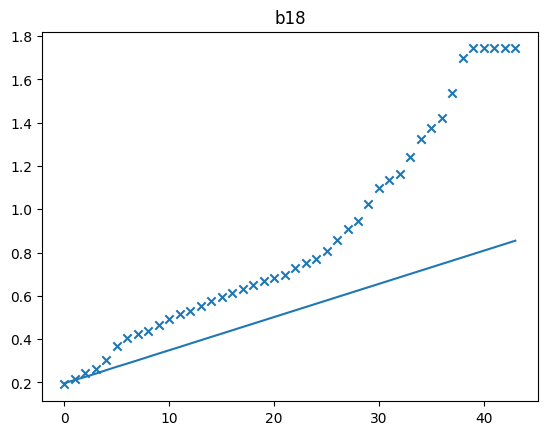

R-squared (test): 0.11994457639607659
MSE (test): 0.20101304937506181
MAE (test): 0.33963618652750516
MAPE (test): 32.512095334175015


In [ ]:
import pandas as pd
import pmdarima as pm
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import math
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Represents the economical feature you want to work on it (like b18)
eco_var="b18"

class Q1:
	def __init__(self):
		self.min_year_train = 1360
		self.max_year_train = 1391
		self.min_year_test = 1391
		self.max_year_test = 1402
		self.ouput_label = '{}'.format(eco_var)

	def main(self):
		self.calc_time_series()

	def calc_time_series(self):
		data_df = self._read_econ_data()
		train_data_df, test_data_df = self._split_train_test(data_df=data_df)
		model = self._train(train_data_df)
		self._test(model=model, data_df=test_data_df)

	def _train(self, data_df):
		arima = pm.auto_arima(np.array(data_df[self.ouput_label]), error_action='ignore', trace=True,
							  suppress_warnings=True, maxiter=5,
							  seasonal=True, m=12)
		return arima

	def _test(self, model, data_df):
		test_data = np.array(data_df[self.ouput_label])
		x = np.arange(test_data.shape[0])
		plt.scatter(x, test_data, marker='x')
		plt.plot(x, model.predict(n_periods=test_data.shape[0]))
		plt.title(self.ouput_label)
		plt.show()
		##
		result=pd.DataFrame({"Real":test_data.tolist(),"ARIMA_Result":model.predict(n_periods=test_data.shape[0]).tolist()})
		result.to_csv('result|{}.csv'.format(eco_var),index=False)
		files.download('result|{}.csv'.format(eco_var))

		# Calculate MSE and MAE on test data
		y_test=test_data.tolist()
		y_test_pred = model.predict(n_periods=test_data.shape[0]).tolist()
		mse = mean_squared_error(y_test, y_test_pred)
		mae = mean_absolute_error(y_test, y_test_pred)
		# Calculate R-squared for test set
		r2test = r2_score(y_test, y_test_pred)

		# Calculate MAPE on test data
		mape=[]
		for i in range(len(y_test)):
			mape.append((np.abs((y_test[i] - y_test_pred[i]) / y_test[i])) * 100)
	 	mapes = np.mean(mape)

		# Print the evaluation metrics
		print("R-squared (test):", r2test)
		print("MSE (test):", mse)
		print("MAE (test):", mae)
		print("MAPE (test):", np.mean(mape))

		##

	def _split_train_test(self, data_df):
		train_date = []
		train_dollar = []
		test_date = []
		test_dollar = []
		for index, row in data_df.iterrows():
			year, month, day = self._convert_str_to_date(row['Date'])
			miladi_date = self._convert_to_miladi(year=int(year), month=int(month), day=int(day))
			if self.min_year_train <= int(year) < self.max_year_train:
				train_date.append(miladi_date)
				train_dollar.append(math.log(row[self.ouput_label]))
			elif self.min_year_test <= int(year) < self.max_year_test:
				test_date.append(miladi_date)
				test_dollar.append(math.log(row[self.ouput_label]))
		data_df_train = pd.DataFrame({'Date': train_date, self.ouput_label: train_dollar})
		data_df_test = pd.DataFrame({'Date': test_date, self.ouput_label: test_dollar})
		return data_df_train, data_df_test

	def _convert_str_to_date(self, date_str):
		year = date_str.split('-')[0]
		month = date_str.split('-')[1]
		day = date_str.split('-')[2]
		return year, month, day

	def _convert_to_miladi(self, year, month, day):
		miladi_year, miladi_month, miladi_day =jalali_to_gregorian(year=year, month=month, day=day)
		return datetime(year=miladi_year, month=miladi_month, day=miladi_day)

	def _read_econ_data(self, file_path="drive/My Drive/Master Thesis/Time Series Prediction/nbw.csv"):
		data = pd.read_csv(file_path)
		return data


def main():
	q = Q1()
	q.main()

main()
